 # Importing Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
warnings.filterwarnings("ignore")

# Importing Dataset and Profiling

In [2]:
df=pd.read_csv(r"C:\Users\Raghav\Documents\2nd Year\Python for DS\Project\credit_score.csv")

!pip install ydata-profiling
!pip install --upgrade --force-reinstall llvmlite

from ydata-profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [4]:
df.shape

(50000, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [6]:
df.duplicated().value_counts()

False    50000
dtype: int64

In [7]:
df.columns=[x.lower() for x in df.columns]
df

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


In [8]:
Unimportant_features=['id', 'customer_id', 'name', 'ssn']

In [9]:
df.drop(Unimportant_features, axis=1, inplace=True)

In [10]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8,
    "September":9,
        "October":10,
    "November":11,
    "December":12,}
df['month'] = df['month'].replace(month_mapping)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     50000 non-null  int64  
 1   age                       50000 non-null  object 
 2   occupation                50000 non-null  object 
 3   annual_income             50000 non-null  object 
 4   monthly_inhand_salary     42502 non-null  float64
 5   num_bank_accounts         50000 non-null  int64  
 6   num_credit_card           50000 non-null  int64  
 7   interest_rate             50000 non-null  int64  
 8   num_of_loan               50000 non-null  object 
 9   type_of_loan              44296 non-null  object 
 10  delay_from_due_date       50000 non-null  int64  
 11  num_of_delayed_payment    46502 non-null  object 
 12  changed_credit_limit      50000 non-null  object 
 13  num_credit_inquiries      48965 non-null  float64
 14  credit

In [12]:
df['credit_mix'].value_counts()

Standard    18379
Good        12260
_            9805
Bad          9556
Name: credit_mix, dtype: int64

In [13]:
df.isnull().sum().reset_index().rename(columns={'index':'feature_name',0:'null_counts'})

,feature_name,null_counts
0,month,0
1,age,0
2,occupation,0
3,annual_income,0
4,monthly_inhand_salary,7498
5,num_bank_accounts,0
6,num_credit_card,0
7,interest_rate,0
8,num_of_loan,0
9,type_of_loan,5704


# Exploratory Data Analysis

In [14]:
#Dropping the nulls values with threshold = 3
df=df[df.isnull().sum(axis=1)<3]

In [15]:
df["age"] = pd.to_numeric(df["age"], errors="coerce")
age_mean=df["age"].mean()
df["age"].fillna(age_mean, inplace=True)
df = df[df['age'].astype(int).between(10, 90)]

In [16]:
import pandas as pd

df['credit_history_age'] = df['credit_history_age'].str.extract('(\d+)').astype(float)


df['credit_history_age'] = df['credit_history_age'] / 12


mean_age = df['credit_history_age'].mean()
df['credit_history_age'].fillna(mean_age, inplace=True)

In [17]:
df['credit_history_age']

0        1.833333
1        1.833333
2        1.540718
4        2.250000
5        2.250000
           ...   
49994    0.500000
49996    2.583333
49997    2.666667
49998    2.666667
49999    2.666667
Name: credit_history_age, Length: 45792, dtype: float64

In [18]:
df["monthly_balance"] = pd.to_numeric(df["monthly_balance"], errors="coerce")
month_mean=df["monthly_balance"].mean()
df["monthly_balance"].fillna(month_mean, inplace=True)

In [19]:
df["annual_income"] = pd.to_numeric(df["annual_income"], errors="coerce")
an_mean=df["annual_income"].mean()
df["annual_income"].fillna(an_mean, inplace=True)

In [20]:
df["amount_invested_monthly"] = pd.to_numeric(df["amount_invested_monthly"], errors="coerce")
invest_mean=df["amount_invested_monthly"].mean()
df["amount_invested_monthly"].fillna(invest_mean, inplace=True)

In [21]:
df["num_credit_inquiries"] = pd.to_numeric(df["num_credit_inquiries"], errors="coerce")
in_mean=df["num_credit_inquiries"].mean()
df["num_credit_inquiries"].fillna(in_mean, inplace=True)

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent', fill_value='Missing')
df['type_of_loan'] = imputer.fit_transform(df[['type_of_loan']])


In [23]:
df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,9,23.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,2022.0,Good,809.98,35.030402,1.833333,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,10,24.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,33.053114,1.833333,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,11,24.0,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,33.811894,1.540718,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
4,9,28.0,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,5.0,Good,605.03,25.926822,2.250000,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
5,10,28.0,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,5.0,Good,605.03,30.116600,2.250000,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083


In [24]:
def filter_delayed_payments(value):
    if "__" in str (value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_","")
    elif str(value)=='_':
        return str(value)
    else:
        return str(value)

In [25]:
df['num_of_delayed_payment']=df['num_of_delayed_payment'].apply(filter_delayed_payments)
df['num_of_delayed_payment']=df['num_of_delayed_payment'].astype("float")

In [26]:
def filter_general(value):
    if '_' in str(value):
        return str(value).split('_')[1]
    elif '_' in str (value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [27]:
df.drop(df[df["monthly_balance"]=='__-333333333333333333333333333__'].index,inplace=True)

In [28]:
df["changed_credit_Limit"]=df["changed_credit_limit"].apply(lambda x:x.split("-")[-1])
df.drop(df[df["changed_credit_limit"]=="_"].index,inplace=True)
df["changed_credit_limit"]=df["changed_credit_limit"].astype("float")

In [29]:
df['outstanding_debt'] = pd.to_numeric(df['outstanding_debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [30]:
df['occupation']=df['occupation'].replace('_______',np.nan)
df['occupation']=df['occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer', 'Lawyer', 'Media_manager', 'Doctor', 'Journalist', 'Manager', 'Accountnat', 'Musician', 'Mechanic', 'Writer', 'Architect'])))

In [31]:
df['occupation'].value_counts()

Scientist        5868
Lawyer           2996
Engineer         2879
Architect        2873
Mechanic         2865
Developer        2806
Accountant       2801
Media_Manager    2800
Entrepreneur     2775
Teacher          2766
Journalist       2740
Doctor           2717
Manager          2684
Musician         2628
Writer           2623
Name: occupation, dtype: int64

In [32]:
df['credit_mix']=df['credit_mix'].replace('_',np.nan)
df['credit_mix']=df['credit_mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

In [33]:
df['payment_of_min_amount']=df['payment_of_min_amount'].replace('NM', np.nan)
df['payment_of_min_amount']=df['payment_of_min_amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [34]:
df['payment_behaviour']=df['payment_behaviour'].replace('!@9#%8', np.nan)
df['payment_behaviour']=df['payment_behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'Low_spent_Medium_value_payments'])))

In [35]:
for i in ['monthly_inhand_salary', 'num_of_delayed_payment', 'num_credit_inquiries', 'amount_invested_monthly', 'monthly_balance']:
    df[i].fillna(df[i].median, inplace=True)

In [36]:
df["monthly_inhand_salary"] = pd.to_numeric(df["monthly_inhand_salary"], errors="coerce")
month_mean=df["monthly_inhand_salary"].mean()
df["monthly_inhand_salary"].fillna(month_mean, inplace=True)

In [37]:
df["num_of_loan"] = pd.to_numeric(df["num_of_loan"], errors="coerce")
month_mean=df["num_of_loan"].mean()
df["num_of_loan"].fillna(month_mean, inplace=True)

In [38]:
df["num_of_delayed_payment"] = pd.to_numeric(df["num_of_delayed_payment"], errors="coerce")
month_mean=df["num_of_delayed_payment"].mean()
df["num_of_delayed_payment"].fillna(month_mean, inplace=True)

In [39]:
df["changed_credit_Limit"] = pd.to_numeric(df["changed_credit_Limit"], errors="coerce")
month_mean=df["changed_credit_Limit"].mean()
df["changed_credit_Limit"].fillna(month_mean, inplace=True)

In [40]:
df["amount_invested_monthly"].value_counts()

194.554566     3875
0.000000         94
236.642682        1
149.998579        1
123.526223        1
               ... 
829.526466        1
1151.542717       1
109.700675        1
100.958137        1
220.457878        1
Name: amount_invested_monthly, Length: 40854, dtype: int64

In [41]:
df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,changed_credit_Limit
0,9,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,35.030402,1.833333,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,11.27
1,10,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,33.053114,1.833333,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,13.27
2,11,24.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,33.811894,1.540718,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,12.27
4,9,28.0,Scientist,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,...,Good,605.03,25.926822,2.250000,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,5.42
5,10,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,...,Good,605.03,30.116600,2.250000,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,5.42


In [42]:
print(df.columns)

Index(['month', 'age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'type_of_loan', 'delay_from_due_date', 'num_of_delayed_payment',
       'changed_credit_limit', 'num_credit_inquiries', 'credit_mix',
       'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'changed_credit_Limit'],
      dtype='object')


In [43]:
print(df.isnull().sum())

month                       0
age                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
changed_credit_Limit        0
dtype: int64


# Data Visualisation

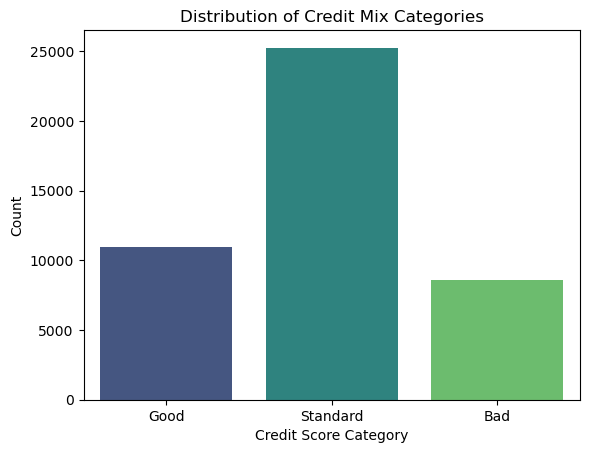

In [44]:
sns.countplot(x='credit_mix', data=df, palette='viridis')
plt.title('Distribution of Credit Mix Categories')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.show()

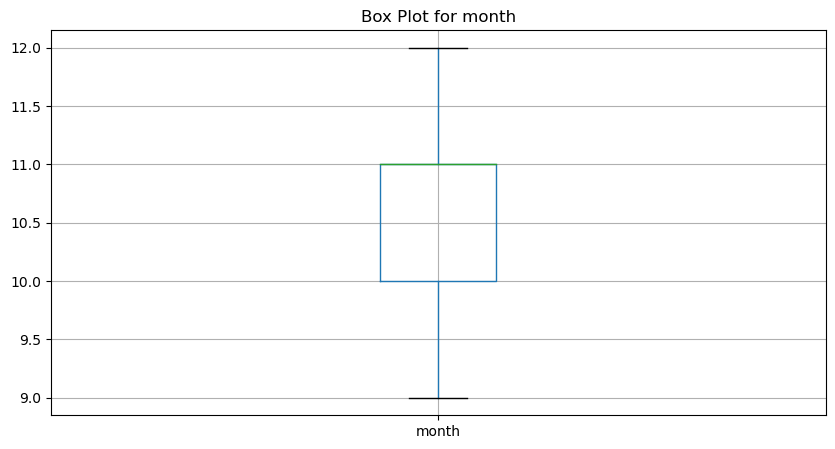

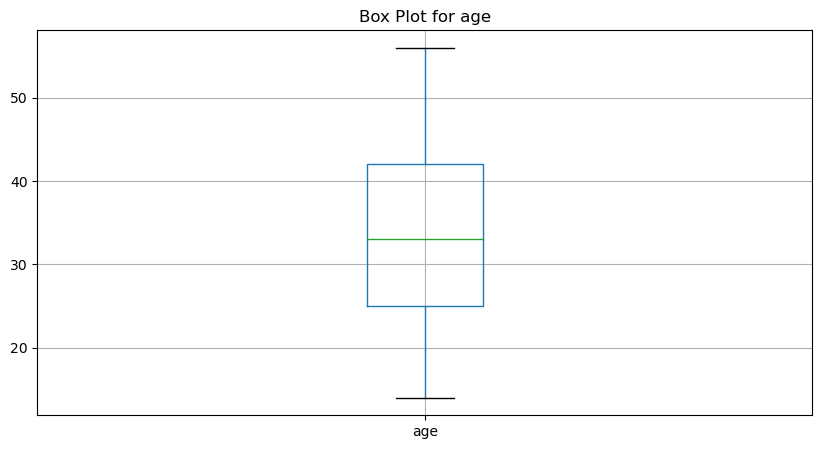

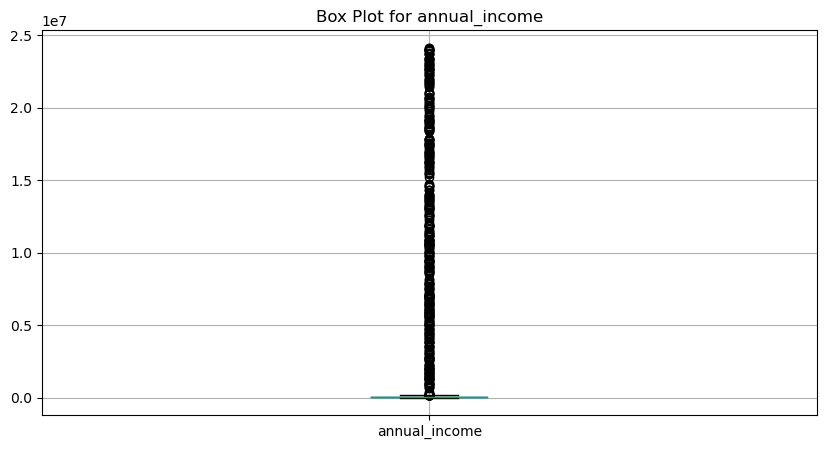

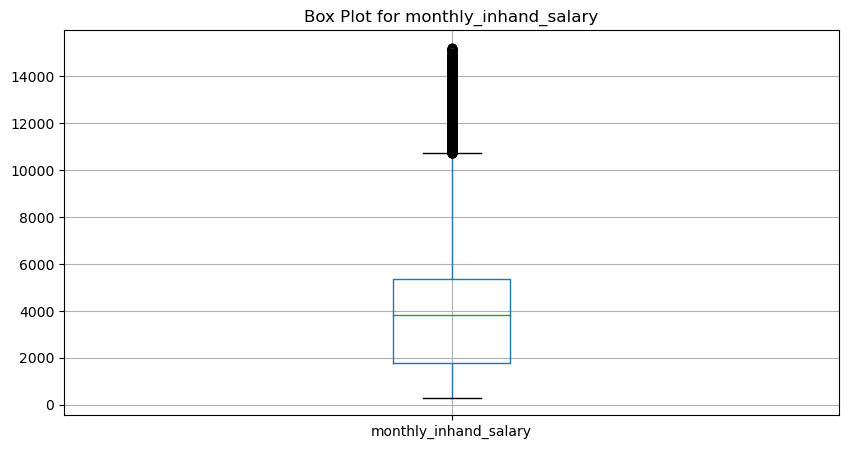

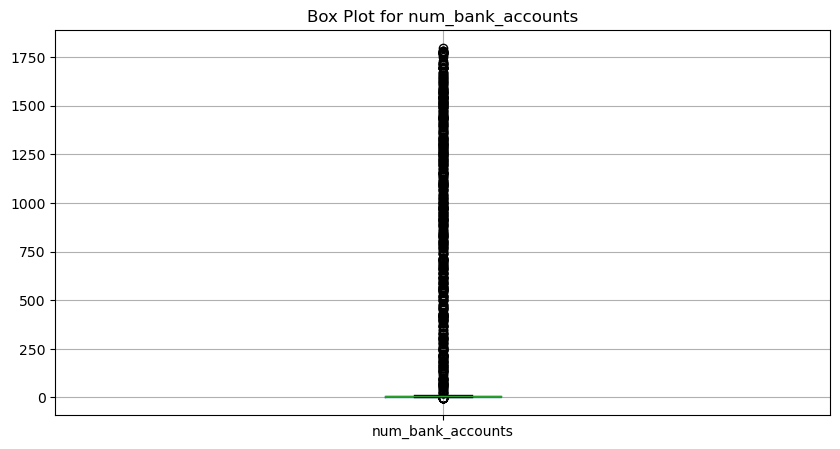

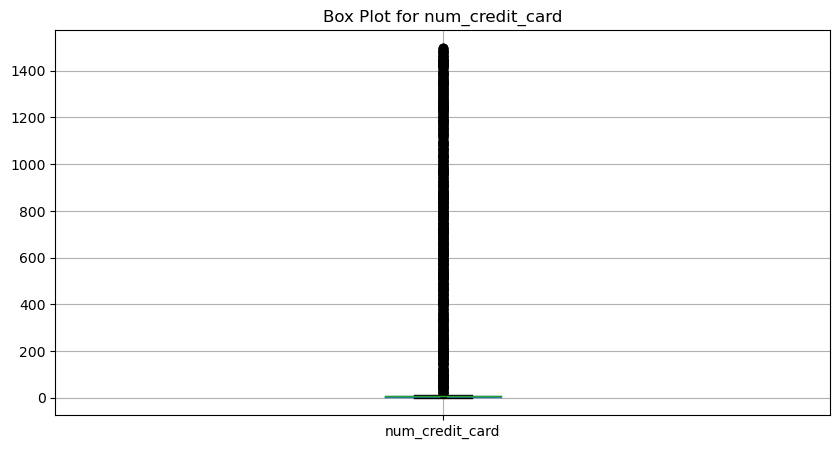

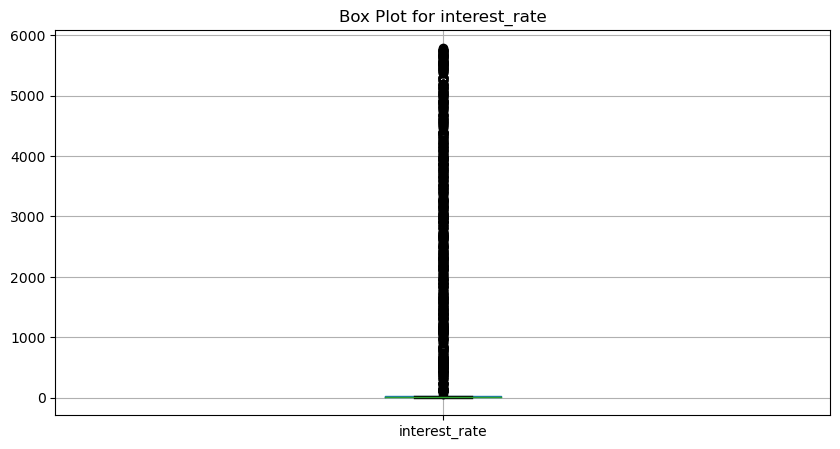

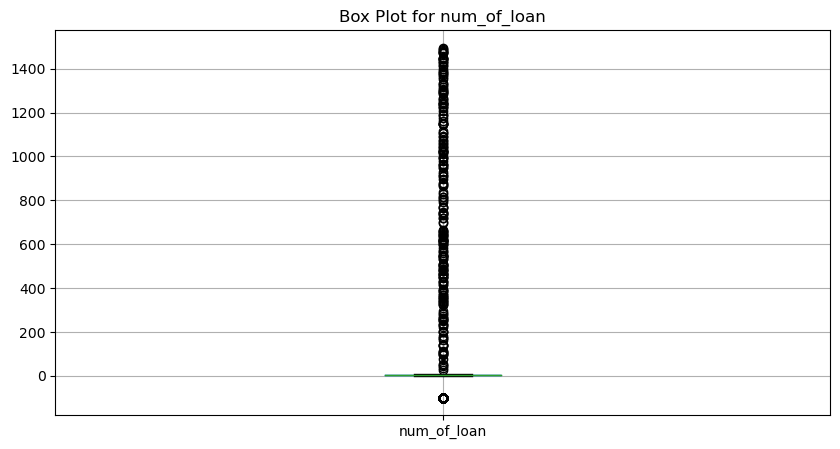

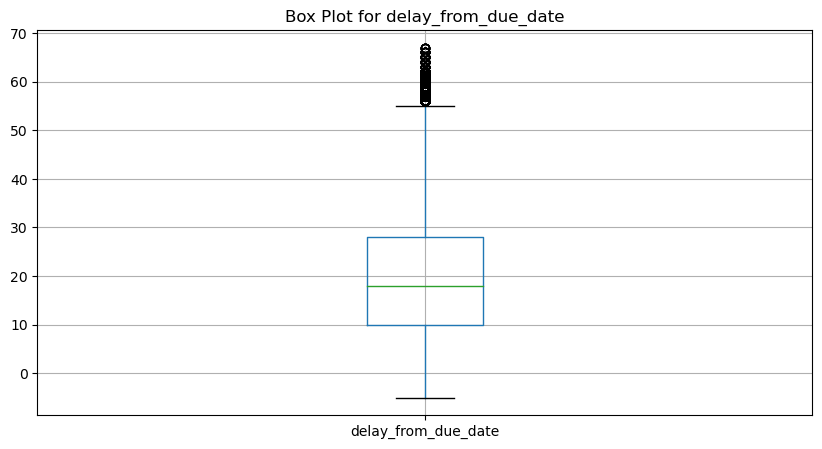

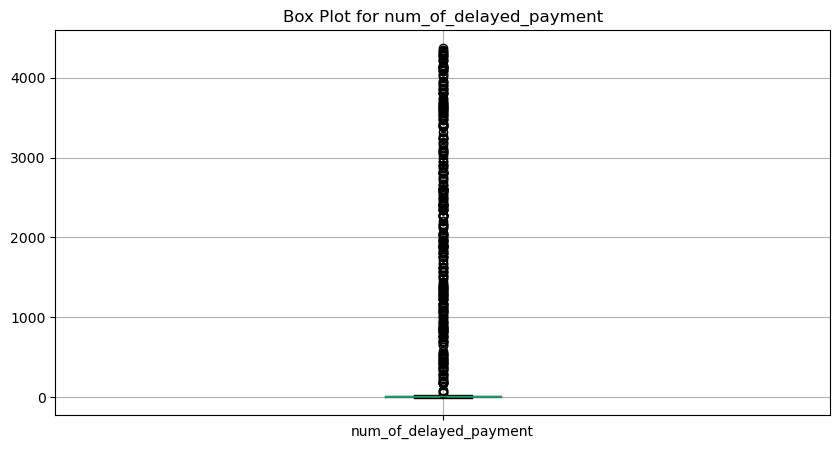

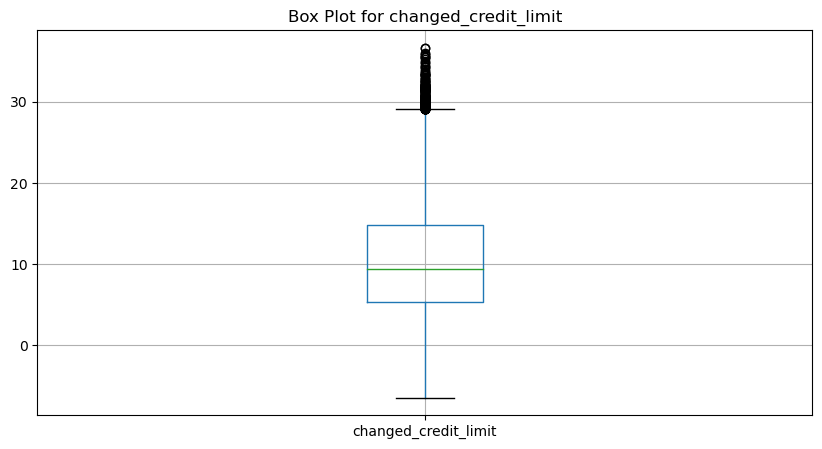

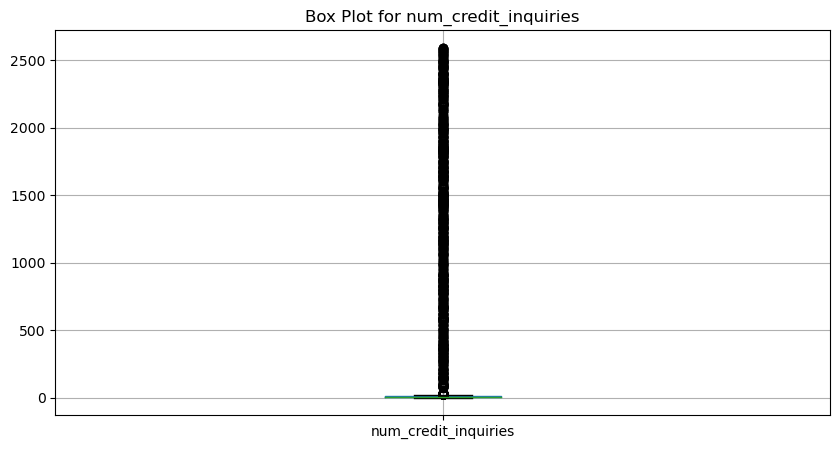

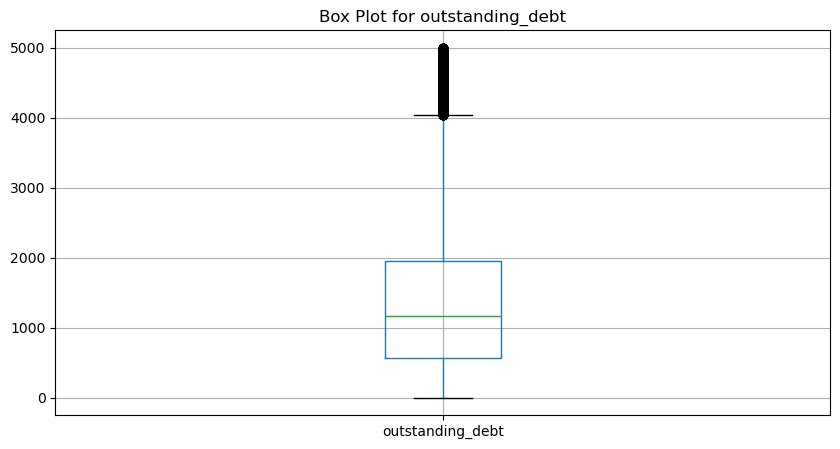

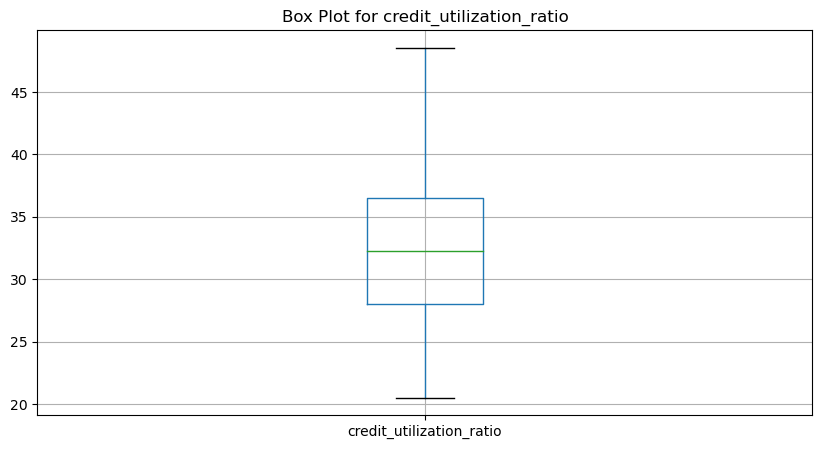

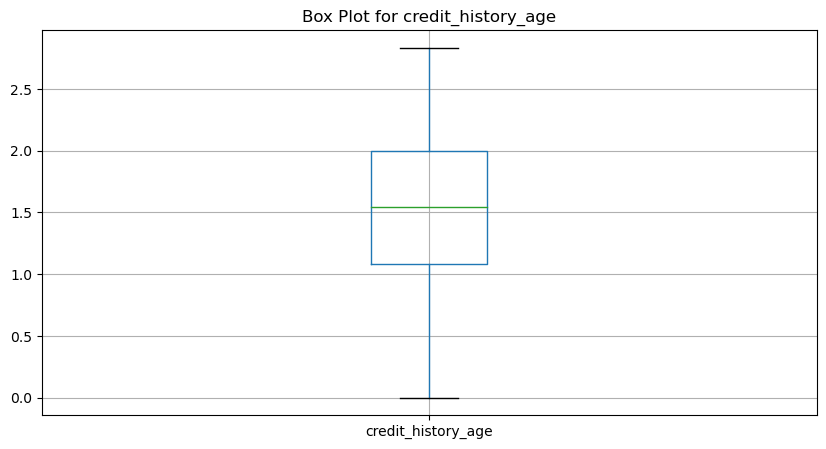

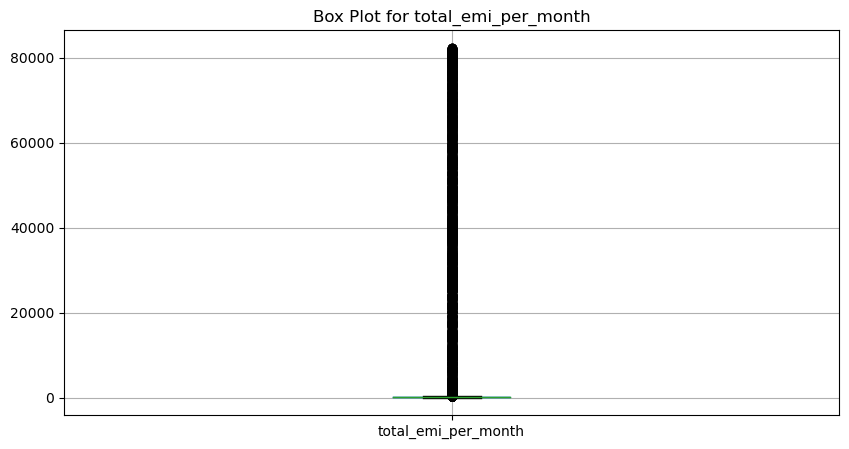

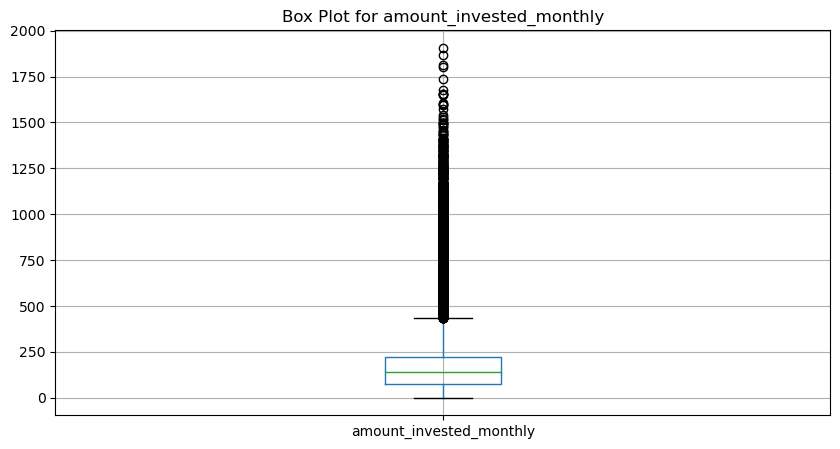

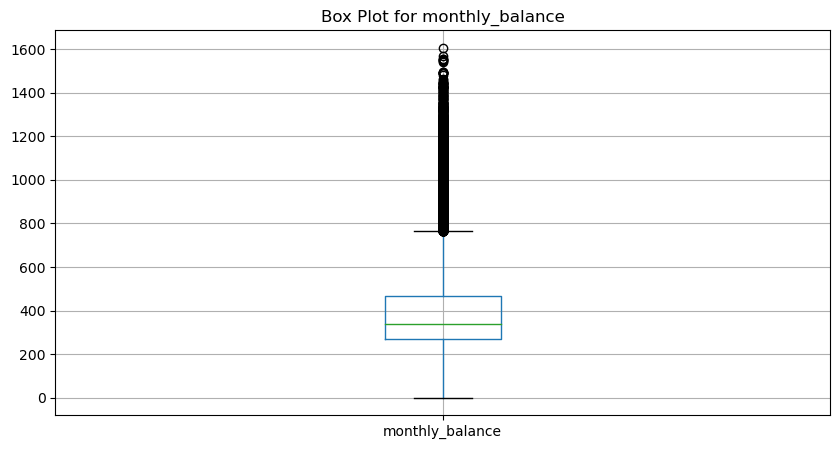

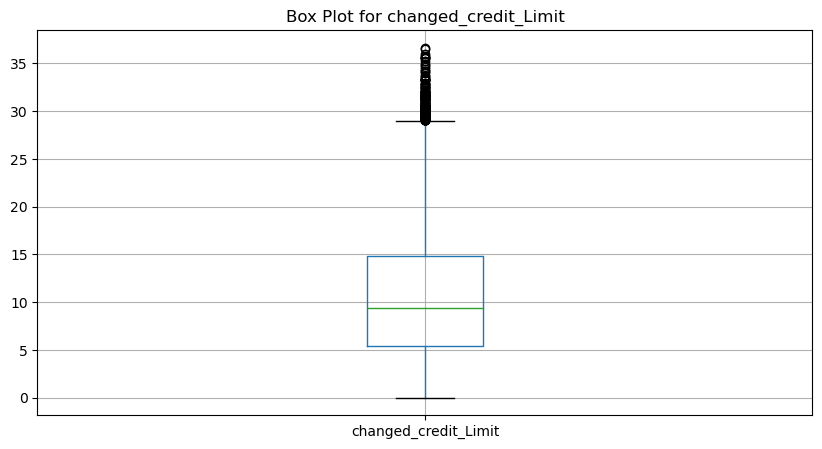

In [45]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    plt.figure(figsize=(10,5))
    df.boxplot(column=[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

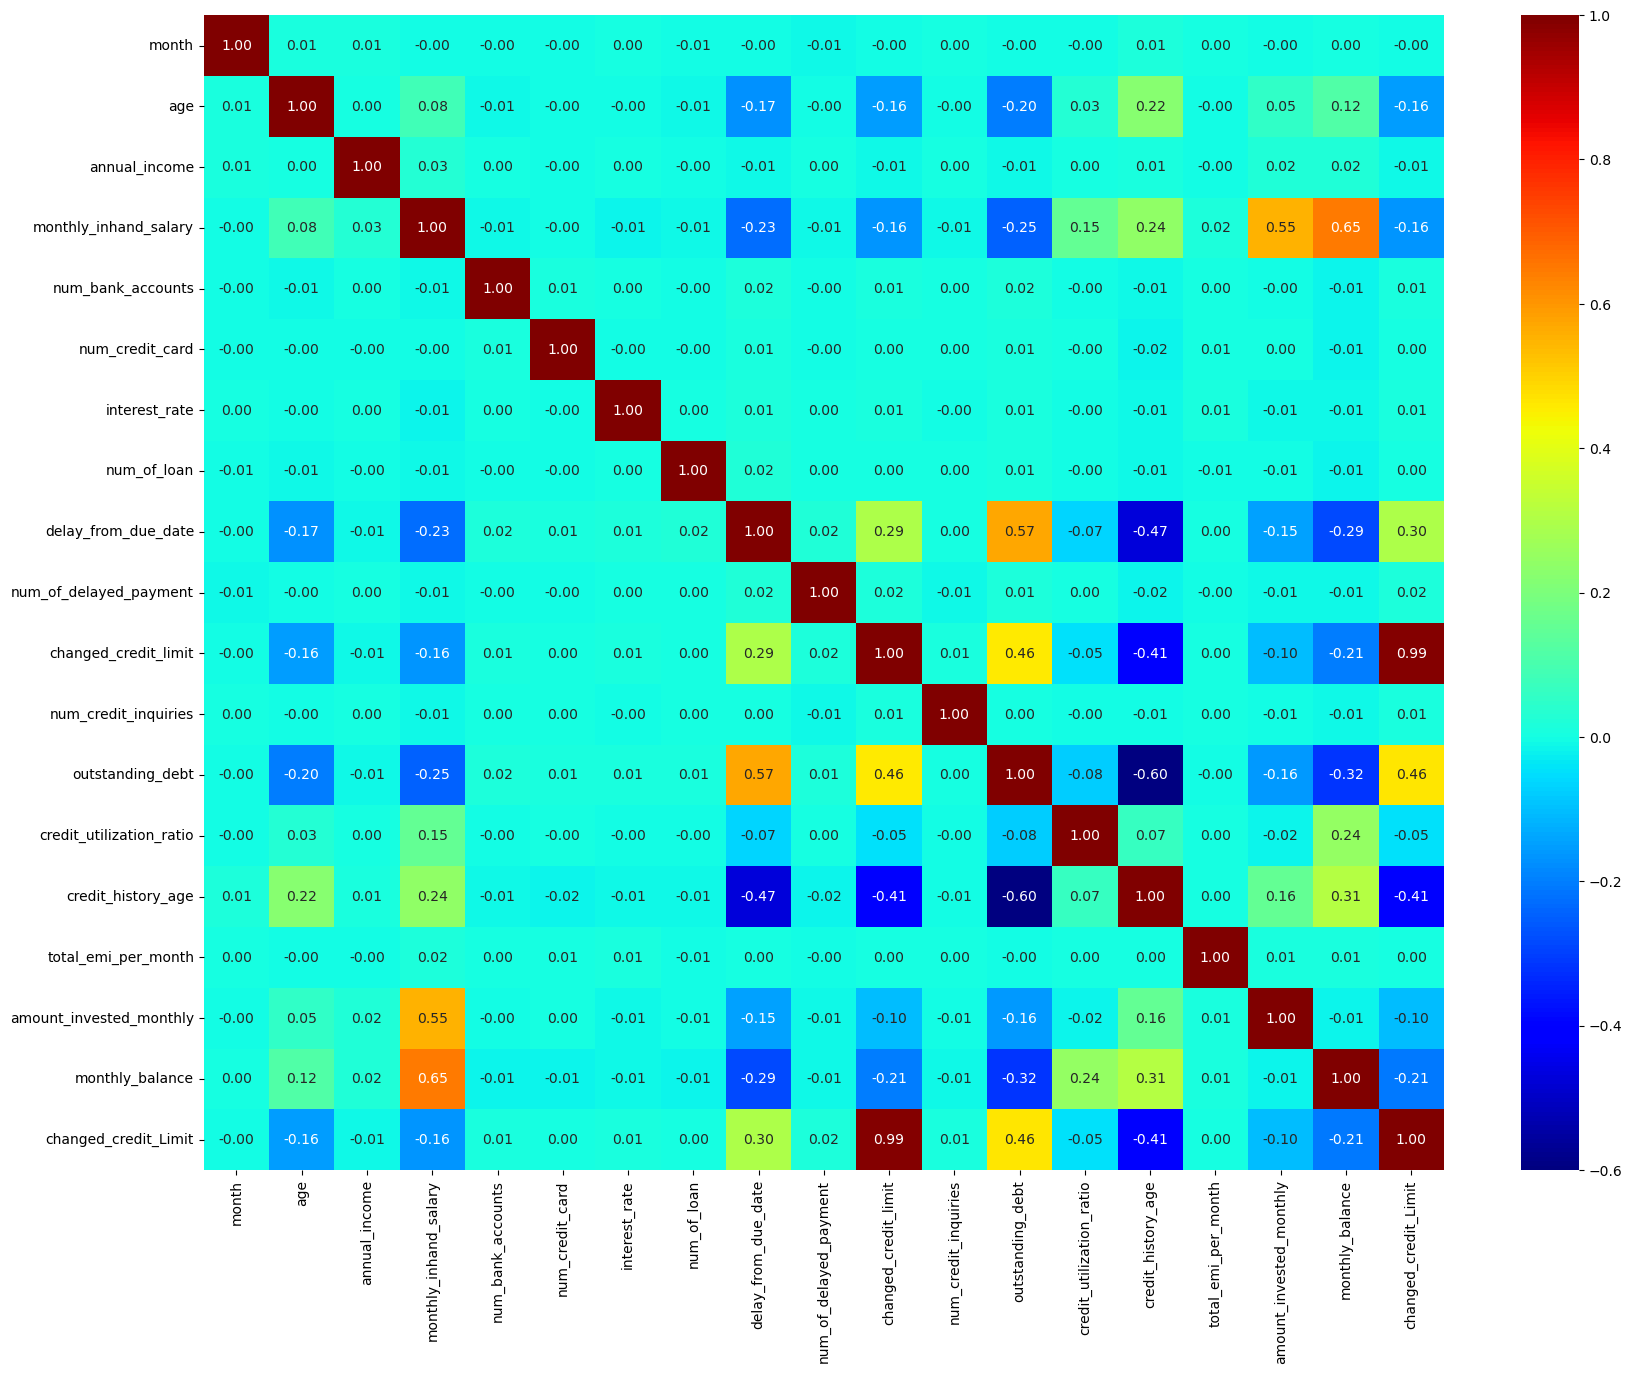

In [46]:
cr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cr,annot=True,fmt=".2f",cmap="jet")
plt.show()

In [47]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'credit_mix' is the column you want to encode
column_to_encode = 'credit_mix'

# Handling missing values (replace NaN with a placeholder value)
df[column_to_encode].fillna('missing', inplace=True)

# Initialize and fit the OrdinalEncoder
encoder = OrdinalEncoder()
df[column_to_encode] = encoder.fit_transform(df[[column_to_encode]])

# Display the result
print(df.tail())

       month   age occupation  annual_income  monthly_inhand_salary  \
49994     11  29.0  Scientist       20002.88            1929.906667   
49996      9  25.0   Mechanic       39628.99            4181.444447   
49997     10  25.0   Mechanic       39628.99            3359.415833   
49998     11  25.0   Mechanic       39628.99            4181.444447   
49999     12  25.0   Mechanic       39628.99            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
49994                 10                8             29     5.000000   
49996                  4                6              7     3.305689   
49997                  4                6              7     2.000000   
49998                  4                6              7     3.305689   
49999                  4                6              7     2.000000   

                                            type_of_loan  ...  credit_mix  \
49994  Personal Loan, Auto Loan, Mortgage Loan, Stude... 

In [48]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [49]:
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the result
print(df.tail())

       month   age  occupation  annual_income  monthly_inhand_salary  \
49994     11  29.0          12       20002.88            1929.906667   
49996      9  25.0           9       39628.99            4181.444447   
49997     10  25.0           9       39628.99            3359.415833   
49998     11  25.0           9       39628.99            4181.444447   
49999     12  25.0           9       39628.99            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
49994                 10                8             29     5.000000   
49996                  4                6              7     3.305689   
49997                  4                6              7     2.000000   
49998                  4                6              7     3.305689   
49999                  4                6              7     2.000000   

       type_of_loan  ...  credit_mix  outstanding_debt  \
49994          4913  ...         0.0           3571.70   
49996       

In [50]:
df.tail()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,changed_credit_Limit
49994,11,29.0,12,20002.88,1929.906667,10,8,29,5.000000,4913,...,0.0,3571.70,27.027812,0.500000,1,60.964772,50.846847,2,341.179047,18.31
49996,9,25.0,9,39628.99,4181.444447,4,6,7,3.305689,683,...,1.0,502.38,27.758522,2.583333,0,35.104023,181.442999,5,409.394562,11.50
49997,10,25.0,9,39628.99,3359.415833,4,6,7,2.000000,683,...,1.0,502.38,36.858542,2.666667,0,35.104023,194.554566,3,349.726332,13.50
49998,11,25.0,9,39628.99,4181.444447,4,6,7,3.305689,683,...,1.0,502.38,39.139840,2.666667,0,35.104023,97.598580,2,463.238981,11.50
49999,12,25.0,9,39628.99,3359.415833,4,6,7,2.000000,683,...,2.0,502.38,34.108530,2.666667,0,35.104023,220.457878,4,360.379683,11.50


# Model Training and Testing

In [51]:
X = df.drop('credit_mix', axis=1)
y = df['credit_mix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Model 1: Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

Decision Tree Accuracy: 0.7852760736196319


In [53]:
# Model 2: Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8636921360847741


In [54]:
# Model 3: KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train , y_train)
knn_score_test=knn.score(X_test , y_test)
knn_score_test

0.6627997769102063

Classifier: K-Nearest Neighbors
Accuracy: 0.6690
Precision: 0.6653
Recall: 0.6690
F1 Score: 0.6664


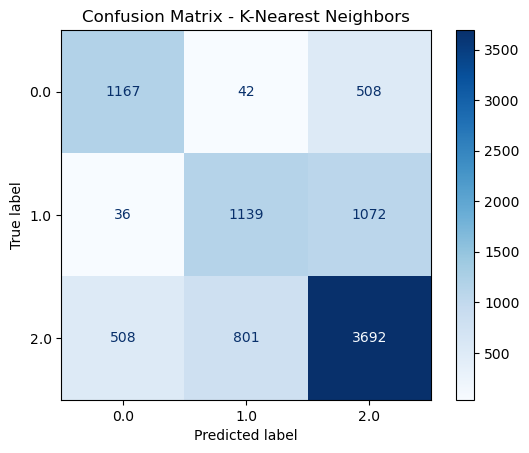

Classifier: Decision Tree
Accuracy: 0.7853
Precision: 0.7850
Recall: 0.7853
F1 Score: 0.7851


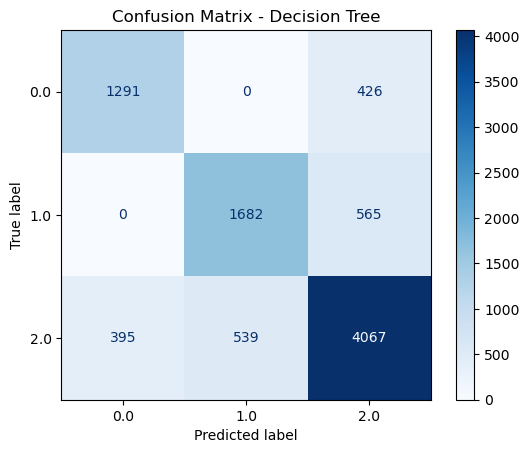

Classifier: Random Forest
Accuracy: 0.8637
Precision: 0.8739
Recall: 0.8637
F1 Score: 0.8641


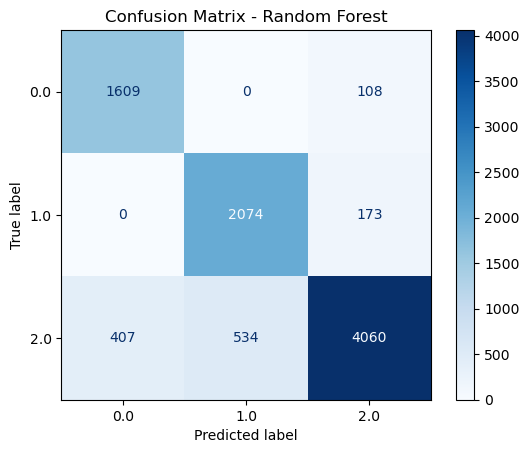

In [55]:
def evaluate_classifier(clf, X_train, X_test, y_train, y_test, classifier_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=np.unique(y))
    disp.ax_.set_title(f"Confusion Matrix - {classifier_name}")
    plt.show()

knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

evaluate_classifier(knn_clf, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")
evaluate_classifier(dt_clf, X_train, X_test, y_train, y_test, "Decision Tree")
evaluate_classifier(rf_clf, X_train, X_test, y_train, y_test, "Random Forest")